In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn import set_config

In [79]:
df = pd.read_csv('titanic.csv')

In [80]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [81]:
df.drop(columns = ['Name', 'PassengerId', 'Ticket', 'Cabin'], inplace = True)

In [82]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['Survived']), df['Survived'], test_size = 0.2, random_state = 42)

In [83]:
x_train.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5,S
733,2,male,23.0,0,0,13.0,S


In [84]:
y_train.head(2)

,Survived
331,0
733,0


In [85]:
# imputation transfer
trf1 = ColumnTransformer([
    ('impute_age', SimpleImputer(), [2]),
    ('impute_embarked', SimpleImputer(strategy = 'most_frequent'), [6])
], remainder = 'passthrough')

In [86]:
trf1

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute_age', SimpleImputer(), [2]),
                                ('impute_embarked',
                                 SimpleImputer(strategy='most_frequent'),
                                 [6])])

In [87]:
# one hot encoding
trf2 = ColumnTransformer([
    ('ohe_sex_embarked',OneHotEncoder(sparse_output=False, handle_unknown='ignore'),[1,6])
],  remainder = 'passthrough')

In [88]:
trf2

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe_sex_embarked',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 [1, 6])])

In [89]:
trf3 = ColumnTransformer([
    ('scale', MinMaxScaler(), [1, 10])
])

In [90]:
trf3

ColumnTransformer(transformers=[('scale', MinMaxScaler(), [1, 10])])

In [91]:
trf4 = SelectKBest(score_func = chi2, k = 8)

In [92]:
trf5 = DecisionTreeClassifier()

**Create Pipeline**

In [93]:
pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf4),
    ('trf5', trf5)
])

In [94]:
pipe.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=8 is greater than n_features=2. All the features will be returned.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  [1, 10])])),
                ('trf4',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x7cc912060540>)),
                ('trf5', DecisionTreeClassifier())])

In [95]:
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_age', SimpleImputer(), [2]),
                                 ('impute_embarked',
                                  SimpleImputer(strategy='most_frequent'),
                                  [6])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_sex_embarked',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  [1, 6])]),
 'trf3': ColumnTransformer(transformers=[('scale', MinMaxScaler(), [1, 10])]),
 'trf4': SelectKBest(k=8, score_func=<function chi2 at 0x7cc912060540>),
 'trf5': DecisionTreeClassifier()}

In [96]:
set_config(display="diagram")

In [97]:
y_pred = pipe.predict(x_test)

In [98]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [99]:
accuracy_score(y_test, y_pred)

0.5865921787709497

In [100]:
confusion_matrix(y_test,y_pred)

array([[105,   0],
       [ 74,   0]])

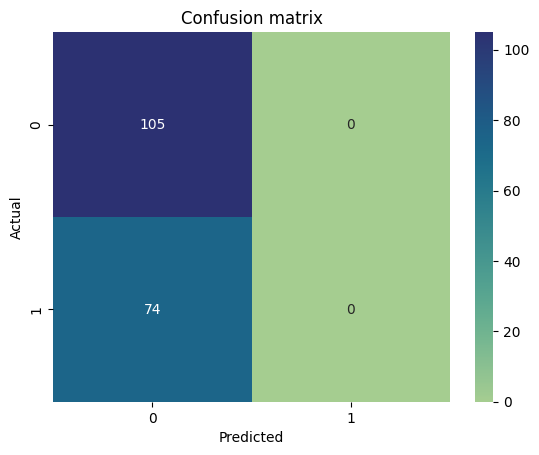

In [101]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='crest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

Cross Validation using Pipeline

In [102]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, x_train, y_train, scoring = 'accuracy').mean()

np.float64(0.6235989362749926)

GridSearch Using Pipeline

In [103]:
params = {
    'trf5__max_depth':[1,2,3,4,5,None]
}

In [104]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, params, cv = 5, scoring = 'accuracy')
grid.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=8 is greater than n_features=2. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=8 is greater than n_features=2. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=8 is greater than n_features=2. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=8 is greater than n_features=2. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=8 is greater than n_features=2. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.11

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('impute_age',
                                                                         SimpleImputer(),
                                                                         [2]),
                                                                        ('impute_embarked',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [6])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe_sex_embarked',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         [1,
                                                                          6])])),
                                       ('trf3',
                                        ColumnTransformer(transformers=[('scale',
                                                                         MinMaxScaler(),
                                                                         [1,
                                                                          10])])),
                                       ('trf4',
                                        SelectKBest(k=8,
                                                    score_func=<function chi2 at 0x7cc912060540>)),
                                       ('trf5', DecisionTreeClassifier())]),
             param_grid={'trf5__max_depth': [1, 2, 3, 4, 5, None]},
             scoring='accuracy')

In [105]:
grid.best_score_

np.float64(0.6235989362749926)

In [106]:
grid.best_params_

{'trf5__max_depth': 1}

Exporting Using Joblib

In [107]:
import joblib

In [108]:
joblib.dump(pipe, 'my_pipeline.pkl')

['my_pipeline.pkl']

Exporting using pickle

In [109]:
import pickle

In [110]:
pickle.dump(pipe, open('titanic_pipe.pkl', 'wb'))